In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('sp500_data_cleaned.csv', index_col=0, parse_dates=True)

In [9]:
df_log_returns = np.log(df / df.shift(1)) #Get log returns

df_log_returns.head()
df_log_returns.to_csv('sp500_log_returns.csv')

In [3]:
df_log_returns = pd.read_csv('sp500_log_returns.csv', index_col=0, parse_dates=True)
df_price = pd.read_csv('sp500_data_cleaned.csv', index_col=0, parse_dates=True)


sums = df_log_returns.sum()
print(sums.max())
max_return_stock = sums.idxmax()
min_return_stock = sums.idxmin()
print(f'Stock with highest log return: {max_return_stock} with return {np.e**sums.max()}')
print(f'Stock with lowest log return: {min_return_stock} with return {np.e**sums.min()}')

sums.sort_values()


3.012150780386834
Stock with highest log return: NVDA with return 20.331080624056757
Stock with lowest log return: WBD with return 0.2560521318260821


WBD    -1.362374
PSKY   -1.238786
NCLH   -1.053739
CCL    -1.009593
INTC   -0.827492
          ...   
ANET    2.014825
BLDR    2.031993
TSLA    2.210592
SMCI    2.869129
NVDA    3.012151
Length: 483, dtype: float64

Because the data is in relative values of log returns, I can simply just *add* the values.

In order to find the percent change, just take the **inverse** of the log.

In [3]:
volatility = df_log_returns.std() * np.sqrt(252)  # Annualized volatility
volatility_sorted = volatility.sort_values()
volatility_sorted


JNJ     0.198861
CL      0.207275
PG      0.211896
KO      0.211949
VZ      0.214508
          ...   
SMCI    0.694867
MRNA    0.747636
APA     0.756454
CCL     0.767196
NCLH    0.809943
Length: 483, dtype: float64

Volitility is the **how much returns flucate around the mean**
so the **standard deivation is taken** 

In order to properly assess std dev, you must *annualize* to the amount of trading of days in the year(252)
cant do it linearly bc AP STATS - std dev is a squared value

Formula:

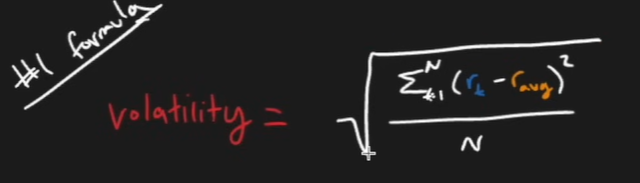


C:\Users\omran\AppData\Local\Temp\ipykernel_20476\3082967203.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = (aapl[len(aapl)-1] - aapl[0]) / (len(aapl)-1)
C:\Users\omran\AppData\Local\Temp\ipykernel_20476\3082967203.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = aapl[0]


Text(0.5, 1.0, 'AAPL Stock Price with Average Return\n Annualized Volatility: 0.32')

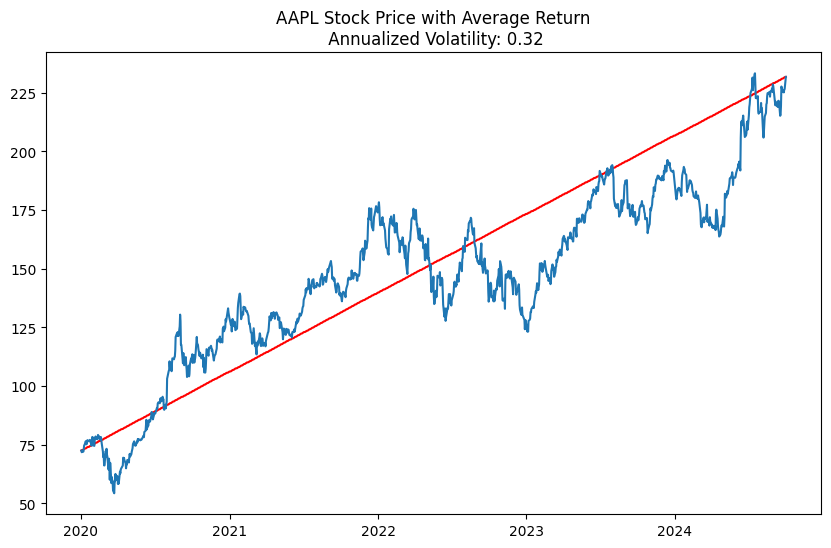

In [4]:
aapl = df_price["AAPL"]
df_aapl = pd.DataFrame(aapl)
df_aapl['Days Since Start'] = np.arange(len(df_aapl))

m = (aapl[len(aapl)-1] - aapl[0]) / (len(aapl)-1)
b = aapl[0]

x = aapl.index
y = m * np.arange(len(aapl)) + b

plt.figure(figsize=(10,6))
plt.plot(x, y, color='red', label='Trend Line')
plt.plot(aapl)
volatility_aapl = aapl.pct_change().std() * np.sqrt(252)
plt.title(f'AAPL Stock Price with Average Return\n Annualized Volatility: {volatility_aapl:.2f}')


## Comparing Log Returns v Volatitly

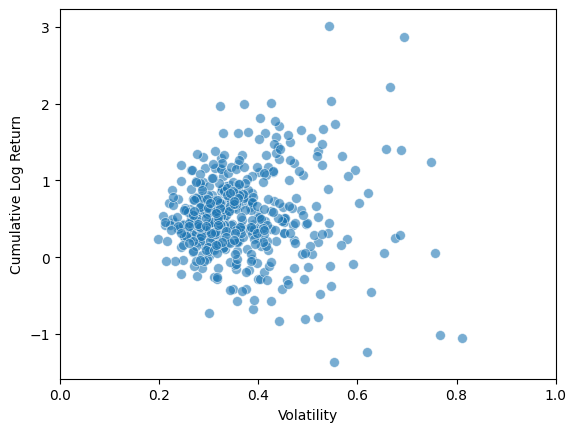

In [ ]:

plot_df = pd.DataFrame({'Volatility': volatility, 'Cumulative Log Return': sums})


sns.scatterplot(data=plot_df, x='Volatility', y='Cumulative Log Return', alpha=0.6, s=50)

plt.xlim(0,1)
# plt.ylim(-1.5,3.5)
plt.show()


### Correlation Matrix Creation

<Axes: >

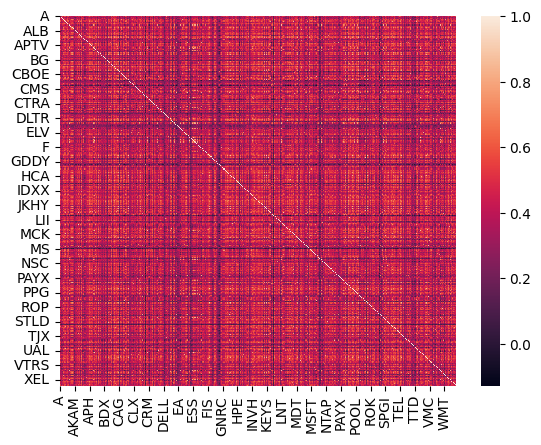

In [ ]:
sns.heatmap(df_log_returns.corr())

In [ ]:
#Find highly correlated stocks
dictionary = {}
for stock in df_log_returns.columns:
    for other_stock in df_log_returns.columns:
        if stock != other_stock: 
            correlation = df_log_returns[stock].corr(df_log_returns[other_stock])
            if correlation > 0.8: #only high correlation
                dictionary[stock] = dictionary.get(stock, []) + [other_stock]
print(dictionary)

{'ACGL': ['EG'], 'ADI': ['MCHP', 'NXPI', 'TXN'], 'ADP': ['PAYX'], 'AEE': ['AEP', 'ATO', 'CMS', 'DUK', 'ED', 'ES', 'ETR', 'EVRG', 'EXC', 'LNT', 'NI', 'SO', 'WEC', 'XEL'], 'AEP': ['AEE', 'CMS', 'DUK', 'ES', 'EVRG', 'LNT', 'NI', 'SO', 'WEC', 'XEL'], 'AFL': ['PRU'], 'AIG': ['MET', 'PFG', 'PRU'], 'AJG': ['BRO', 'MMC'], 'AMAT': ['KLAC', 'LRCX', 'MCHP', 'TER'], 'AME': ['ETN'], 'AMP': ['BAC', 'JPM', 'MET', 'MS', 'PFG', 'PRU', 'RJF'], 'AMT': ['CCI', 'SBAC'], 'APA': ['DVN', 'EOG', 'FANG', 'OXY'], 'APH': ['TEL'], 'ATO': ['AEE', 'CMS', 'LNT', 'NI', 'SO', 'WEC'], 'AVB': ['CPT', 'EQR', 'ESS', 'MAA', 'UDR'], 'AWK': ['CMS', 'LNT'], 'AXP': ['COF', 'SYF'], 'AZO': ['ORLY'], 'BAC': ['AMP', 'BK', 'C', 'CFG', 'FITB', 'GS', 'HBAN', 'JPM', 'KEY', 'MET', 'MS', 'MTB', 'PFG', 'PNC', 'PRU', 'RF', 'TFC', 'USB', 'WFC'], 'BK': ['BAC', 'NTRS', 'STT'], 'BKR': ['HAL', 'SLB'], 'BRO': ['AJG'], 'BX': ['KKR'], 'C': ['BAC', 'CFG', 'FITB', 'GS', 'JPM', 'KEY', 'MS', 'PFG', 'PNC', 'PRU', 'RF', 'WFC'], 'CB': ['TRV', 'WRB'], 'CC

## Covaraince vs Correlation

**Correlation** is from -1 to +1 and shows direction and strength of relationship <br>
if 2 vars move in the dirction direction, then *postive* correlation

**Covariance**, however, includes the volitary/variance of the variables <br>
Higher the value = MORE volitaty OR higher correlation

Covariance = Correlation * Volatility(A) * Volatility(B)

In [ ]:
#Covariance matrix annualized
df_log_returns.cov() *252

,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
A,0.089618,0.049583,0.026668,0.045574,0.041446,0.051858,0.059128,0.061111,0.034584,0.044841,...,0.062384,0.060281,0.029114,0.032697,0.053716,0.096762,0.034315,0.041627,0.068053,0.053797
AAPL,0.049583,0.103907,0.024441,0.040946,0.041153,0.057450,0.080029,0.070322,0.032272,0.050398,...,0.066869,0.066324,0.033822,0.033348,0.050669,0.112860,0.037294,0.039629,0.072149,0.052587
ABBV,0.026668,0.024441,0.059408,0.030186,0.032632,0.028543,0.026768,0.026734,0.023733,0.030548,...,0.035763,0.031178,0.023917,0.028913,0.025215,0.036177,0.022034,0.029102,0.025284,0.030027
ABT,0.045574,0.040946,0.030186,0.070530,0.035921,0.042120,0.045852,0.042000,0.028331,0.041162,...,0.049842,0.031257,0.034490,0.021052,0.040705,0.068736,0.030310,0.036719,0.046375,0.044949
ACGL,0.041446,0.041153,0.032632,0.035921,0.117431,0.051504,0.039002,0.050959,0.053383,0.056709,...,0.079395,0.083919,0.039562,0.060189,0.060237,0.064538,0.045243,0.052341,0.054056,0.040779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYZ,0.096762,0.112860,0.036177,0.068736,0.064538,0.094922,0.140723,0.128638,0.047292,0.082004,...,0.124743,0.153531,0.043364,0.053194,0.092902,0.426873,0.068114,0.076543,0.139749,0.094116
YUM,0.034315,0.037294,0.022034,0.030310,0.045243,0.040976,0.035283,0.045608,0.033535,0.039821,...,0.061136,0.070648,0.029452,0.036776,0.043905,0.068114,0.068307,0.045364,0.044581,0.038907
ZBH,0.041627,0.039629,0.029102,0.036719,0.052341,0.047883,0.039614,0.052304,0.039025,0.042161,...,0.064903,0.086567,0.027010,0.049041,0.049755,0.076543,0.045364,0.100729,0.053119,0.040898
ZBRA,0.068053,0.072149,0.025284,0.046375,0.054056,0.068438,0.079093,0.088598,0.047340,0.058471,...,0.089317,0.090093,0.029694,0.048326,0.067244,0.139749,0.044581,0.053119,0.169078,0.061600


<Axes: xlabel='Date'>

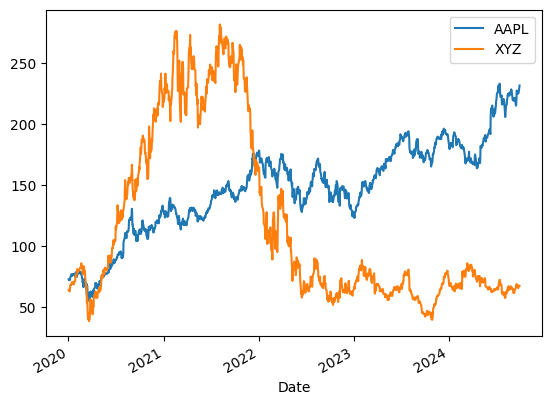

In [16]:
df.loc["2020-01-02":"2024-09-30", ["AAPL", "XYZ"]].plot()


## Sharpe Ratio

SR = Return / Risk

= Adv Daily Net / Vol

Higher sharpe = more linear and less volitile a stock is

Low sharpe = more flucations in stock price


### **Leverage** 
it amplifies BOTH returns and vol but SR stays the same

so high SR strategies work well with high leverage

#### T-test
how likely an investment will be positive

SR is ***porportional*** to t-stat


### Tangency Portfolio
a portfolio where rational investors who dislike volitality hold ONLY the highest SR stock/equities